<a href="https://colab.research.google.com/github/IlyaMolchanovv/MachineLearning/blob/main/Lab_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

from sklearn.linear_model import LogisticRegression

import sklearn.preprocessing as sklp
import sklearn.metrics as skl

. Загрузить датасет "Titanic".

In [3]:
#task 1
data=pd.read_csv(filepath_or_buffer = "titanic.csv",
                       sep = ',')

Изучить структуру и содержание данных.

In [4]:
#task 2
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Провести предварительный анализ данных:
- проверка наличия пропущенных значений
- корреляции между переменными
- распределение значений целевого признака
- замена категориальных признаков на числовые


In [5]:
#task 3
missing_values = data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-6-57f273a413a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mtr = data.corr()


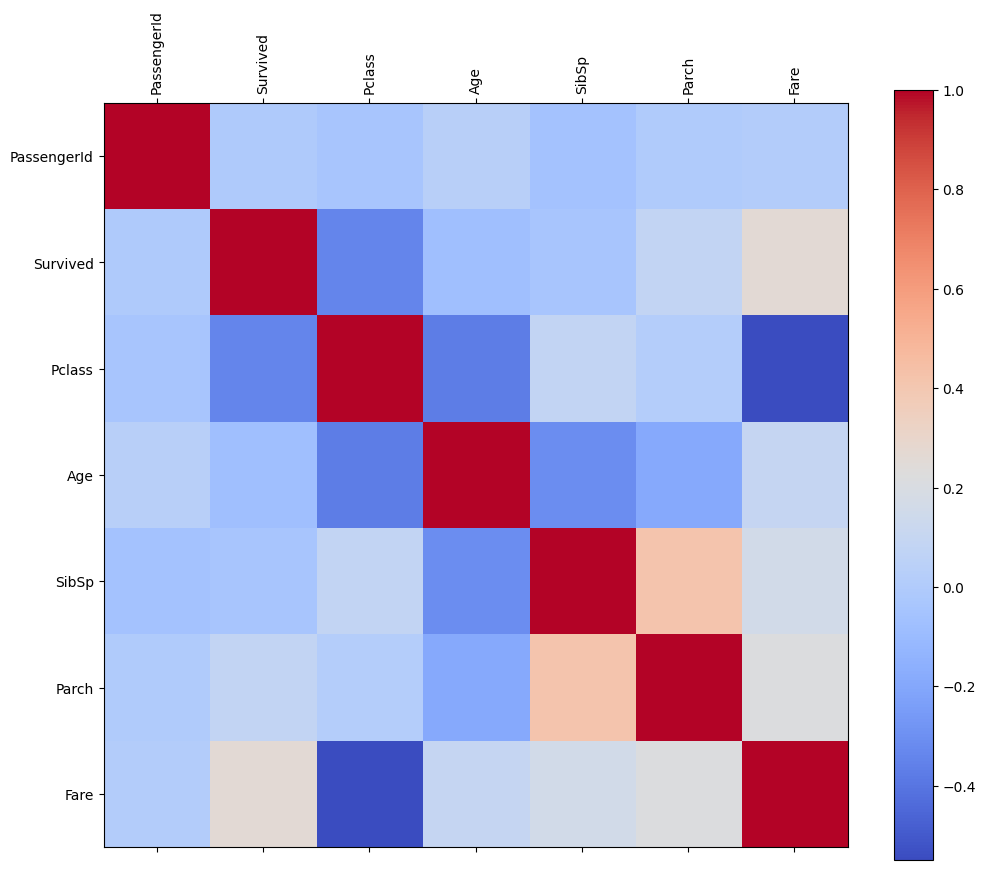

In [6]:
corr_mtr = data.corr()
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr_mtr, cmap="coolwarm")
fig.colorbar(cax)
plt.xticks(range(len(corr_mtr.columns)), corr_mtr.columns, rotation=90)
plt.yticks(range(len(corr_mtr.columns)), corr_mtr.columns)
plt.show()

In [7]:
target_distribution = data['Survived'].value_counts()
print(target_distribution)

0    549
1    342
Name: Survived, dtype: int64


In [8]:
data = pd.get_dummies(data, columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

data.dropna()

data["Age"]=data["Age"].fillna(data["Age"].mean())

Разбить данные на обучающую и тестовую выборки в соотношении
70/30.

In [9]:
#task 4
from sklearn.model_selection import train_test_split

X = data.drop("Survived", axis=1)
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 623
Размер тестовой выборки: 268


<Axes: >

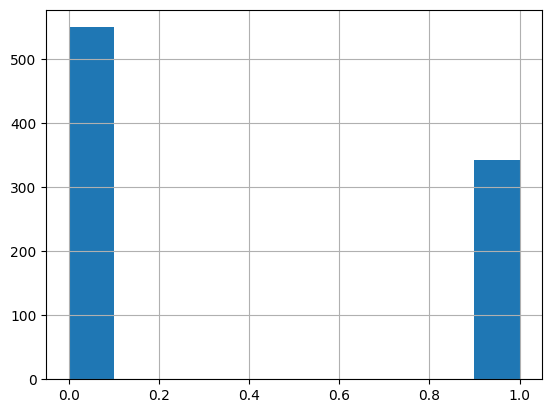

In [10]:
y.hist()

Обучить модель логистической регрессии (LogisticRegression) на
обучающей выборке.


In [14]:
#task 5
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Оценить качество модели на тестовой выборке с помощью метрик
таких как точность, полнота, F1-мера и матрица ошибок (accuracy_score,
precision_score, recall_score, f1_score, confusion_matrix)

In [16]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Точность precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Полнота: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1}")

confusion = confusion_matrix(y_test, y_pred)
print(f"Матрица ошибок:\n{confusion}")

Точность accuracy: 0.8134328358208955
Точность precision: 0.801980198019802
Полнота: 0.7297297297297297
F1-мера: 0.7641509433962265
Матрица ошибок:
[[137  20]
 [ 30  81]]


Визуализировать результаты предсказания, сравнив исходные
значения классов и предсказанные значения.

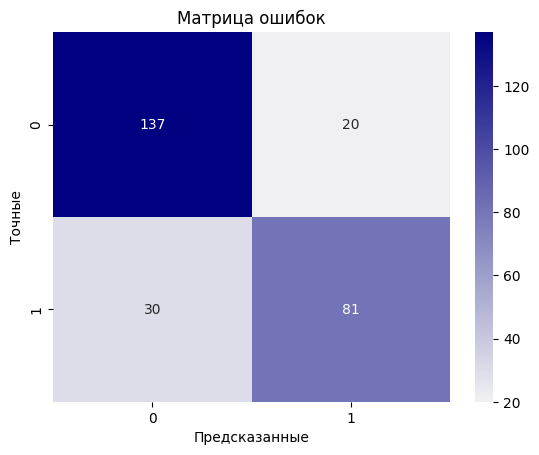

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels

classes = unique_labels(y_test, y_pred)

cmap = sns.light_palette("navy", as_cmap=True)

sns.heatmap(confusion, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)

plt.title('Матрица ошибок')
plt.xlabel('Предсказанные')
plt.ylabel('Точные')
plt.show()

Провести кросс-валидацию модели и оценить ее качество с помощью
метрик точности, полноты, F1-меры и матрицы ошибок.


In [18]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)

y_cv_pred = cross_val_predict(logreg_model, X, y, cv=5)

accuracy_cv = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy').mean()
print(accuracy_cv)

precision_cv = precision_score(y, y_cv_pred)
print(precision_cv)

recall_cv = recall_score(y, y_cv_pred)
print(recall_cv)

f1_cv = f1_score(y, y_cv_pred)
print(f1_cv)

conf_matrix_cv = confusion_matrix(y, y_cv_pred)
print(conf_matrix_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.78120645282782
0.7615658362989324
0.6257309941520468
0.6869983948635634
[[482  67]
 [128 214]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

knn_model = KNeighborsClassifier()
svm_model = SVC()
rf_model = RandomForestClassifier()

param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_svm = {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

grid_knn.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

best_knn_model = grid_knn.best_estimator_
best_svm_model = grid_svm.best_estimator_
best_rf_model = grid_rf.best_estimator_

accuracy_knn = best_knn_model.score(X_test, y_test)
accuracy_svm = best_svm_model.score(X_test, y_test)
accuracy_rf = best_rf_model.score(X_test, y_test)

print("Точность KNN:", accuracy_knn)
print("Точность SVM:", accuracy_svm)
print("Точность Random Forest:", accuracy_rf)

Точность KNN: 0.6417910447761194
Точность SVM: 0.6417910447761194
Точность Random Forest: 0.8097014925373134
